# Machine Learning Model Code :
1. Data Transformation
2. Modelling:
  Logistic Regression;
  Hyper parameter tunned Logistic Regression;
  Support Vector Machine (SVM);
  Hyper parameter tunned Support Vector Machine (SVM);

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Installed Libraries

In [4]:
!pip install matplotlib
!pip install imbalanced-learn
!pip install --upgrade ipywidgets
!pip install optuna
!pip install transformers --upgrade
!pip install accelerate --upgrade
!pip install gensim
!pip install nltk
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.5 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.5
    Uninstalling widgetsnbextension-3.6.5:
      Successfully uninstalled widgetsnbextension-3.6.5
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 21.9 MB/s et

Importing all Libraries needed for implemetation

In [5]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import re
import string
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from tqdm import tqdm
import transformers
import torch
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve, auc
from sklearn.svm import SVC
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from transformers import BertForSequenceClassification, BertTokenizer, Trainer, TrainingArguments
from datasets import Dataset
import nltk
nltk.download('punkt')





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Load CSV files:
1. train_final.csv
2. test_final.csv
3. validation_final.csv

In [6]:
#Reading the train data from drive
df_train = pd.read_csv('/content/drive/MyDrive/Dataset for Models/train_final.csv')
#Reading the train data from drive
df_validation = pd.read_csv('/content/drive/MyDrive/Dataset for Models/test_final.csv')
#Reading the train data from drive
df_test = pd.read_csv('/content/drive/MyDrive/Dataset for Models/validation_final.csv')

Data Transformation for All models
1. Tokenization
2. Removing Stop Words
3. Lemmatization
4. Splitting the features & target variable of train, test and valid dataset
5. Text Vectorization

In [7]:
# Tokenization of datasets for modelling

df_train['text'] = df_train['text'].apply(word_tokenize)
df_validation['text'] = df_validation['text'].apply(word_tokenize)
df_test['text'] = df_test['text'].apply(word_tokenize)


In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
# Prepare Stop Words
stop_words = stopwords.words('english')
stop_words.extend(['from', 'https', 'and', 'is', 'are', 'the', 'this', 'that', 'i', 'am'])

def remove_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

df_train['text'] = df_train['text'].apply(remove_stopwords)
df_validation['text'] = df_validation['text'].apply(remove_stopwords)
df_test['text'] = df_test['text'].apply(remove_stopwords)

In [10]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [11]:
# Step 7: Lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos='v') for token in tokens]
    return lemmatized_tokens


for df in [df_train, df_validation, df_test]:
    tqdm.pandas(desc="Lemmatizing")
    df['text'] = df['text'].progress_apply(lemmatize_tokens)

Lemmatizing: 100%|██████████| 1004/1004 [00:16<00:00, 59.40it/s]


In [12]:
# Split the features and target variable of train, valid and test dataset

X_train = df_train['text']
y_train = df_train['label']

X_valid = df_validation['text']
y_valid = df_validation['label']

X_test = df_test['text']
y_test = df_test['label']

In [13]:
#Text Vectorization

X_train_strings = [' '.join(tokens) for tokens in X_train]
X_valid_strings = [' '.join(tokens) for tokens in X_valid]
X_test_strings = [' '.join(tokens) for tokens in X_test]

vectorizer = TfidfVectorizer()

X_train_vectorized = vectorizer.fit_transform(X_train_strings)
X_valid_vectorized = vectorizer.transform(X_valid_strings)
X_test_vectorized = vectorizer.transform(X_test_strings)


Models Implementation
1. Logisitc Regression Model
2. Hyperparameter tunned Logistic Regression Model
3. Support Vector Machine Model
4. Hyperparameter tunned Support Vector Machine Model

In [16]:
# Logistic Regression Model

logreg_model = LogisticRegression()
logreg_model.fit(X_train_vectorized, y_train)

LogisticRegression()

In [17]:
# Evaluation of Logistic Regression on Validation dataset
y_valid_pred = logreg_model.predict(X_valid_vectorized)
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_valid, y_valid_pred, average='weighted')
classification_rep_valid = classification_report(y_valid, y_valid_pred)


print("Validation Accuracy:", accuracy_valid)
print("Validation Precision:", precision)
print("Validation Recall:", recall)
print("Validation F1 Score:", f1_score)
print("Validation Classification Report:\n", classification_rep_valid)


Validation Accuracy: 0.8258706467661692
Validation Precision: 0.8264680317215325
Validation Recall: 0.8258706467661692
Validation F1 Score: 0.825735674679378
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       497
           1       0.81      0.85      0.83       508

    accuracy                           0.83      1005
   macro avg       0.83      0.83      0.83      1005
weighted avg       0.83      0.83      0.83      1005



In [18]:
# Evaluation of Logistic Regression on Test dataset
y_test_pred = logreg_model.predict(X_test_vectorized)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test, recall_test, f1_score_test, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
classification_rep_test = classification_report(y_test, y_test_pred)

print("Test Accuracy:", accuracy_test)
print("Validation Precision:", precision_test)
print("Validation Recall:", recall_test)
print("Validation F1 Score:", f1_score_test)

print("Test Classification Report:\n", classification_rep_test)

Test Accuracy: 0.8077689243027888
Validation Precision: 0.8118554354012522
Validation Recall: 0.8077689243027888
Validation F1 Score: 0.8081904270865703
Test Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.82       549
           1       0.76      0.84      0.80       455

    accuracy                           0.81      1004
   macro avg       0.81      0.81      0.81      1004
weighted avg       0.81      0.81      0.81      1004



In [19]:
# Hyperparameter Tunned Logistic Regression Model

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga'],
    'penalty': ['l1', 'l2']
}

# Create a custom solver map with increased max_iter for 'sag' and 'saga'
custom_solver_map = {
    'liblinear': 1000,
    'lbfgs': 1000,
    'sag': 10000,  # Increased max_iter for 'sag'
    'saga': 10000  # Increased max_iter for 'saga'
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train_vectorized, y_train)

best_logreg_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of 

Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [20]:
# Evaluation of Best Logistic Regression model on Validation dataset
y_valid_pred = best_logreg_model.predict(X_valid_vectorized)
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_valid, y_valid_pred, average='weighted')
classification_rep_valid = classification_report(y_valid, y_valid_pred)


print("Validation Accuracy:", accuracy_valid)
print("Validation Precision:", precision)
print("Validation Recall:", recall)
print("Validation F1 Score:", f1_score)
print("Validation Classification Report:\n", classification_rep_valid)

Validation Accuracy: 0.817910447761194
Validation Precision: 0.8188587335964972
Validation Recall: 0.817910447761194
Validation F1 Score: 0.817700988574247
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.81       497
           1       0.80      0.85      0.82       508

    accuracy                           0.82      1005
   macro avg       0.82      0.82      0.82      1005
weighted avg       0.82      0.82      0.82      1005



In [21]:
# Evaluation of Best Logistic Regression model on Test dataset
y_test_pred = best_logreg_model.predict(X_test_vectorized)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test, recall_test, f1_score_test, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
classification_rep_test = classification_report(y_test, y_test_pred)

print("Test Accuracy:", accuracy_test)
print("Validation Precision:", precision_test)
print("Validation Recall:", recall_test)
print("Validation F1 Score:", f1_score_test)

print("Test Classification Report:\n", classification_rep_test)

Test Accuracy: 0.8067729083665338
Validation Precision: 0.810715470624101
Validation Recall: 0.8067729083665338
Validation F1 Score: 0.8071956759819607
Test Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.82       549
           1       0.76      0.84      0.80       455

    accuracy                           0.81      1004
   macro avg       0.81      0.81      0.81      1004
weighted avg       0.81      0.81      0.81      1004



In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

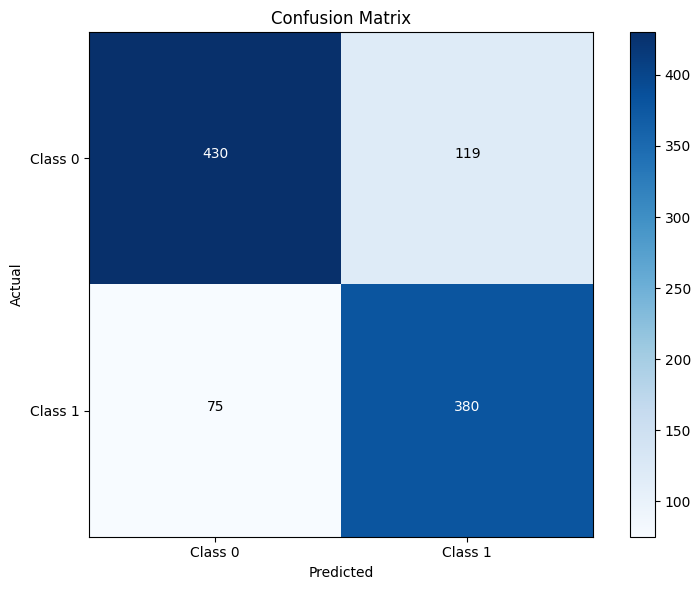

In [24]:
# Calculate Confusion Matrix of Logistic Regression model for test data
cm = confusion_matrix(y_test, y_test_pred)

# Create Confusion Matrix Plot
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# Add Labels and Annotations
classes = ['Class 0', 'Class 1']  # Replace with your actual class labels
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('Actual')

# Annotate cells with counts
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.tight_layout()
plt.show()


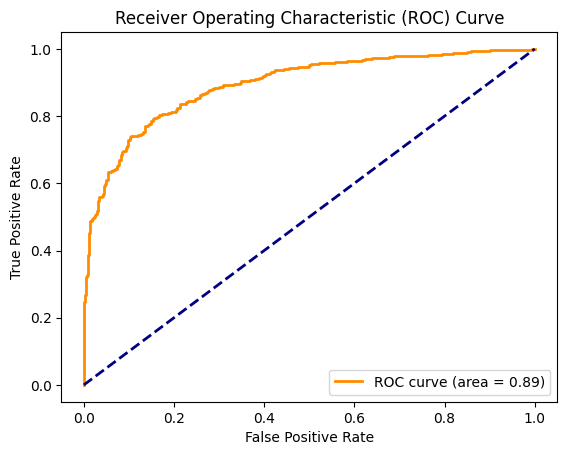

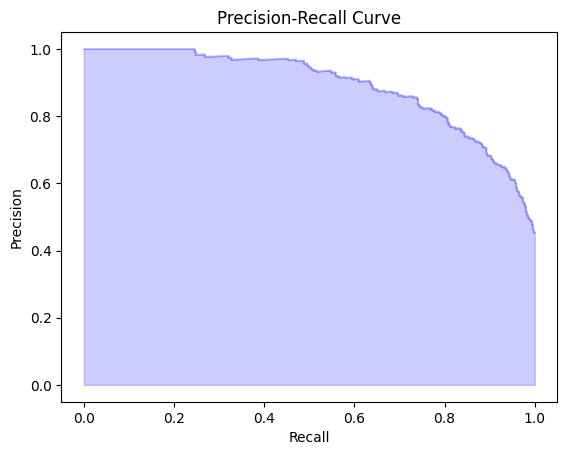

In [25]:
# ROC curve of Logistic Regression model for test data

y_test_pred_proba = best_logreg_model.predict_proba(X_test_vectorized)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = roc_auc_score(y_test, y_test_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Precision & Recall curve of Logistic Regression model for test data

precision, recall, _ = precision_recall_curve(y_test, y_test_pred_proba)
pr_auc = auc(recall, precision)

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


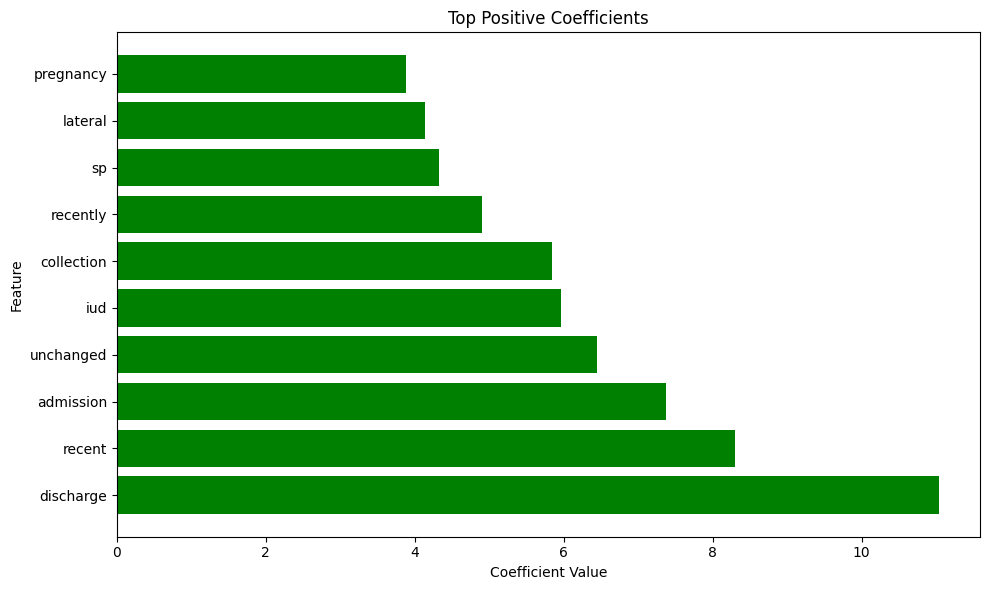

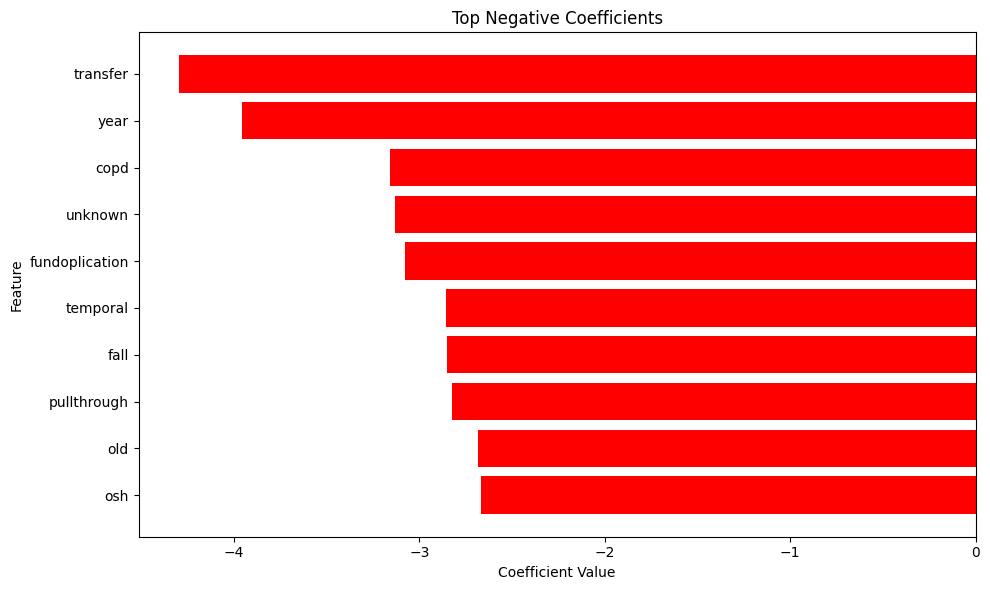

In [26]:
# Plotting the Positive and Negative coefficient

coefficients = best_logreg_model.coef_[0]
feature_names = vectorizer.get_feature_names_out()

coef_dict = {}
for coef, feat in zip(coefficients, feature_names):
    coef_dict[feat] = coef

# Sort coefficients by value
sorted_coef = sorted(coef_dict.items(), key=lambda x: x[1], reverse=True)
top_n = 10


# Extract the top N positive and negative coefficients and their corresponding feature names
top_positive = sorted_coef[:top_n]
top_negative = sorted_coef[-top_n:]

# Split feature names and coefficients for plotting
positive_features, positive_coeffs = zip(*top_positive)
negative_features, negative_coeffs = zip(*top_negative)

# Plotting top positive coefficients
plt.figure(figsize=(10, 6))
plt.barh(positive_features, positive_coeffs, color='green')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top Positive Coefficients')
plt.tight_layout()
plt.show()

# Plotting top negative coefficients
plt.figure(figsize=(10, 6))
plt.barh(negative_features, negative_coeffs, color='red')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top Negative Coefficients')
plt.tight_layout()
plt.show()

In [14]:
# Support Vector Machine
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_vectorized, y_train)

SVC(kernel='linear')

In [15]:
# Evaluation of Support Vector Machine model on Validation dataset
y_valid_pred_svm= svm_model.predict(X_valid_vectorized)

valid_accuracy_svm = accuracy_score(y_valid, y_valid_pred_svm)
precision_valid_svm, recall_valid_svm, f1_score_valid_svm, _ = precision_recall_fscore_support(y_valid, y_valid_pred_svm, average='weighted')
valid_report_svm = classification_report(y_valid, y_valid_pred_svm)

print("Validation Accuracy:", valid_accuracy_svm)
print("Validation Precision:", precision_valid_svm)
print("Validation Recall:", recall_valid_svm)
print("Validation F1 Score:", f1_score_valid_svm)
print("Validation Classification Report:\n", valid_report_svm)

Validation Accuracy: 0.8298507462686567
Validation Precision: 0.8299232623703312
Validation Recall: 0.8298507462686567
Validation F1 Score: 0.8298204113763239
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83       497
           1       0.83      0.84      0.83       508

    accuracy                           0.83      1005
   macro avg       0.83      0.83      0.83      1005
weighted avg       0.83      0.83      0.83      1005



In [16]:
# Evaluation of Support Vector Machine model on test dataset
y_test_pred_svm = svm_model.predict(X_test_vectorized)

test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
precision_test_svm, recall_test_svm, f1_score_test_svm, _ = precision_recall_fscore_support(y_test, y_test_pred_svm, average='weighted')
test_report_svm = classification_report(y_test, y_test_pred_svm)

print("Test Accuracy:", test_accuracy_svm)
print("Validation Precision:", precision_test_svm)
print("Validation Recall:", recall_test_svm)
print("Validation F1 Score:", f1_score_test_svm)

print("Test Classification Report:\n", test_report_svm)

Test Accuracy: 0.8097609561752988
Validation Precision: 0.8135596335549273
Validation Recall: 0.8097609561752988
Validation F1 Score: 0.8101759034588659
Test Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82       549
           1       0.77      0.84      0.80       455

    accuracy                           0.81      1004
   macro avg       0.81      0.81      0.81      1004
weighted avg       0.81      0.81      0.81      1004



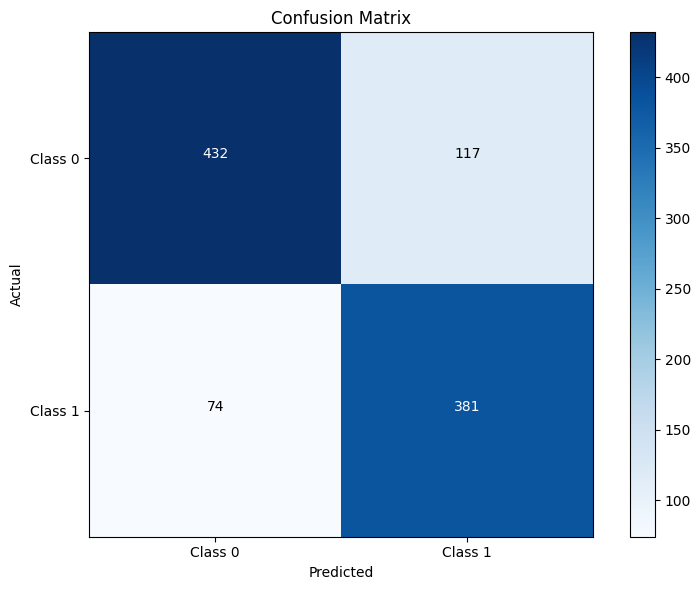

In [30]:
# Calculate Confusion Matrix of Support vector machine model for test data
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_test_pred_svm = svm_model.predict(X_test_vectorized)
cm = confusion_matrix(y_test, y_test_pred_svm)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

classes = ['Class 0', 'Class 1']
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('Actual')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.tight_layout()
plt.show()


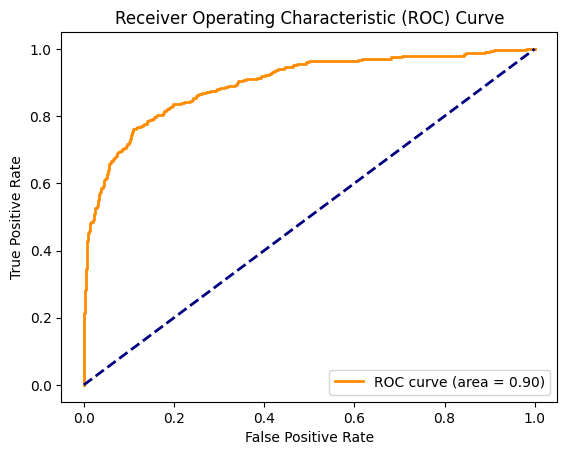

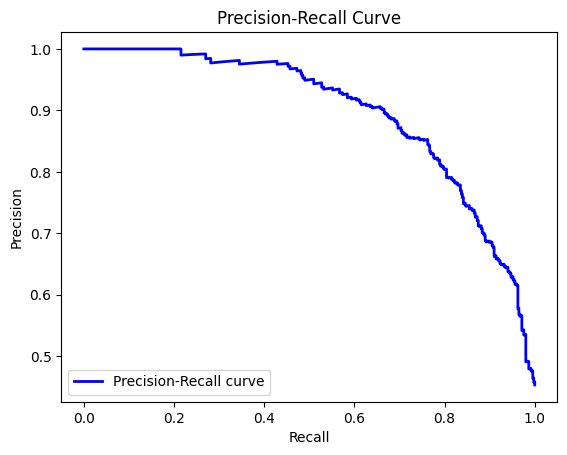

In [31]:
# ROC curve of SVM model for test data
y_test_pred_proba_svm = svm_model.decision_function(X_test_vectorized)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba_svm)
roc_auc = roc_auc_score(y_test, y_test_pred_proba_svm)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve of SVM model for test data
precision, recall, _ = precision_recall_curve(y_test, y_test_pred_proba_svm)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

Hyperparameter Tunning of SVM model

In [ ]:
# Define SVM classifier
svm_classifier = SVC()

In [ ]:

# Define hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [ ]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_vectorized, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
# Get best hyperparameters
best_params = grid_search.best_params_

In [ ]:
# Train SVM model with best hyperparameters
best_svm_model = SVC(**best_params)
best_svm_model.fit(X_train_vectorized, y_train)

SVC(C=1)

Evaluate on Validation dataset of best model

In [ ]:
# Make predictions on validation set using best model
y_valid_pred_svm = best_svm_model.predict(X_valid_vectorized)

# Calculate accuracy
accuracy = accuracy_score(y_valid, y_valid_pred_svm)
print("Accuracy:", accuracy)


# Evaluate the best model on validation set
valid_report = classification_report(y_valid, y_valid_pred_svm)

print("Best Hyperparameters:", best_params)
print("Validation Classification Report:\n", valid_report)

Accuracy: 0.8237051792828686
Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       549
           1       0.79      0.84      0.81       455

    accuracy                           0.82      1004
   macro avg       0.82      0.82      0.82      1004
weighted avg       0.83      0.82      0.82      1004



Evaluate on Test dataset of best model

In [ ]:
# Make predictions on test set using best model
y_test_pred_svm = best_svm_model.predict(X_test_vectorized)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred_svm)
print("Accuracy:", accuracy)

# Evaluate the best model on validation set
valid_report = classification_report(y_test, y_test_pred_svm)

print("Best Hyperparameters:", best_params)
print("Validation Classification Report:\n", valid_report)

Accuracy: 0.826865671641791
Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       497
           1       0.83      0.83      0.83       508

    accuracy                           0.83      1005
   macro avg       0.83      0.83      0.83      1005
weighted avg       0.83      0.83      0.83      1005



Confusion Matrix for best model

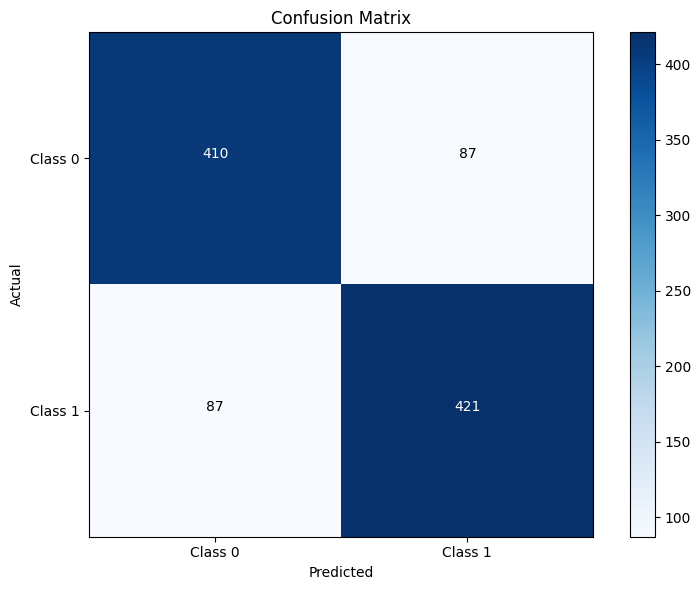

In [ ]:
# Assuming you have y_test (true labels) and y_test_pred (predicted labels) arrays

# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_svm)

# Create Confusion Matrix Plot
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# Add Labels and Annotations
classes = ['Class 0', 'Class 1']  # Replace with your actual class labels
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('Actual')

# Annotate cells with counts
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.tight_layout()
plt.show()


In [ ]:

# Assuming you have y_test (true labels) and y_pred (predicted labels) arrays for the hypertuned model

# Accuracy
accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
print("Accuracy:", accuracy_svm)

# Precision and Recall
precision_svm = precision_score(y_test, y_test_pred_svm)
recall_svm = recall_score(y_test, y_pred)
print("Precision:", precision_svm)
print("Recall:", recall_svm)

Accuracy: 0.826865671641791
Precision: 0.8287401574803149
Recall: 0.8484251968503937


ROC CURVE

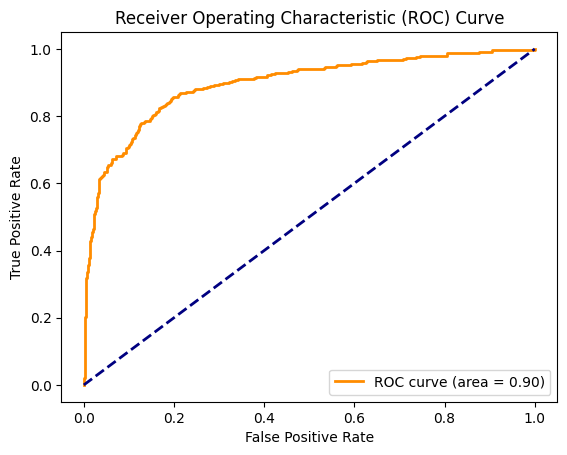

In [ ]:
# ROC Curve
y_test_pred_proba_svm = best_svm_model.decision_function(X_test_vectorized)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba_svm)
roc_auc = roc_auc_score(y_test, y_test_pred_proba_svm)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Precision-Recall Curve

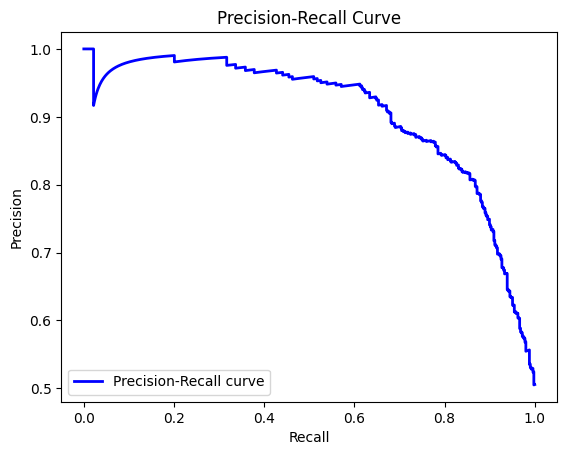

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_test_pred_proba_svm)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

